In [1]:
import numpy as np
from keras.layers import Input,Dense,merge
from keras.models import *

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
trainX=np.random.standard_normal(size=(10000,32))
trainY=np.random.randint(2,size=(10000,1))
trainX[:,1]=trainY[:,0]

In [3]:
inputs=Input(shape=(32,))
attention_pro=Dense(32,activation='softmax',name='attention_vec')(inputs)
attention_mul=merge([inputs,attention_pro],output_shape=32,name='attention_mul',mode='mul')
attention_mul=Dense(64)(attention_mul)
output=Dense(1,activation='sigmoid')(attention_mul)
model=Model(input=inputs,output=output)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
attention_vec (Dense)           (None, 32)           1056        input_1[0][0]                    
__________________________________________________________________________________________________
attention_mul (Merge)           (None, 32)           0           input_1[0][0]                    
                                                                 attention_vec[0][0]              
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 64)           2112        attention_mul[0][0]              
__________

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/keras/legacy/layers.py:465: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  


inputs=Input(shape=(32,))
# attention_pro=Dense(32,activation='softmax',name='attention_vec')(inputs)
# attention_mul=merge([inputs,attention_pro],output_shape=32,name='attention_mul',mode='mul')
attention_mul=Dense(64)(inputs)
output=Dense(1,activation='sigmoid')(attention_mul)
model=Model(input=inputs,output=output)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
print(model.summary())

In [4]:
model.fit(trainX,trainY,epochs=20,batch_size=64,validation_split=0.5)

Train on 5000 samples, validate on 5000 samples
Epoch 1/20
5000/5000 [==============================] - 0s 57us/step - loss: 0.6842 - acc: 0.5910 - val_loss: 0.6737 - val_acc: 0.6478
Epoch 2/20
5000/5000 [==============================] - 0s 32us/step - loss: 0.6473 - acc: 0.7298 - val_loss: 0.6113 - val_acc: 0.7530
Epoch 3/20
5000/5000 [==============================] - 0s 32us/step - loss: 0.5544 - acc: 0.7800 - val_loss: 0.4990 - val_acc: 0.7970
Epoch 4/20
5000/5000 [==============================] - 0s 31us/step - loss: 0.4370 - acc: 0.8222 - val_loss: 0.3888 - val_acc: 0.8264
Epoch 5/20
5000/5000 [==============================] - 0s 33us/step - loss: 0.3190 - acc: 0.8768 - val_loss: 0.2631 - val_acc: 0.9116
Epoch 6/20
5000/5000 [==============================] - 0s 30us/step - loss: 0.1895 - acc: 0.9532 - val_loss: 0.1377 - val_acc: 0.9706
Epoch 7/20
5000/5000 [==============================] - 0s 32us/step - loss: 0.0800 - acc: 0.9914 - val_loss: 0.0537 - val_acc: 0.9940
Epoch 8

In [5]:
t=np.array(trainX[2])
t.shape=1,-1

In [6]:
model.predict(t)

array([[0.00027268]], dtype=float32)

In [7]:
t=np.array(trainX[2])
t.shape=1,-1
print(t.shape)

(1, 32)


In [8]:
from attention_utils import get_activations, get_data

attention_vector = get_activations(model, t,
                                       print_shape_only=True,
                                       layer_name='attention_vec')[0].flatten()

----- activations -----
(1, 32)


In [9]:
    print('attention =', attention_vector)

attention = [0.02426516 0.157373   0.02103738 0.02761797 0.02442673 0.03905715
 0.02036447 0.01803249 0.02243195 0.01763698 0.03414999 0.02208772
 0.0228977  0.02752454 0.01325341 0.05332976 0.02564209 0.027022
 0.02396686 0.01519506 0.02790186 0.03335251 0.03678569 0.01622112
 0.02330712 0.01332708 0.02398701 0.03318956 0.04427004 0.03623366
 0.03136126 0.04275067]


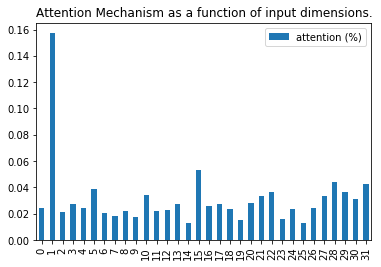

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(attention_vector, columns=['attention (%)']).plot(kind='bar',
                                                                   title='Attention Mechanism as '
                                                                         'a function of input'
                                                                         ' dimensions.')
plt.show()